In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import numpy as np

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Machine Learning/Data/UFO complete - UFO complete.csv')

<ipython-input-2-f544c8bb0fd7>:1: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/drive/MyDrive/Machine Learning/Data/UFO complete - UFO complete.csv')


In [ ]:
df.head()

,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude,Unnamed: 11
0,10/10/1949 20:30,san marcos,tx,us,cylinder,2700,45 minutes,This event took place in early fall around 194...,4/27/2004,29.8830556,-97.941111,NaN
1,10/10/1949 21:00,lackland afb,tx,NaN,light,7200,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...,12/16/2005,29.38421,-98.581082,NaN
2,10/10/1955 17:00,chester (uk/england),NaN,gb,circle,20,20 seconds,Green/Orange circular disc over Chester&#44 En...,1/21/2008,53.2,-2.916667,NaN
3,10/10/1956 21:00,edna,tx,us,circle,20,1/2 hour,My older brother and twin sister were leaving ...,1/17/2004,28.9783333,-96.645833,NaN
4,10/10/1960 20:00,kaneohe,hi,us,light,900,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,1/22/2004,21.4180556,-157.803611,NaN


In [ ]:
df.shape

(88875, 12)

In [ ]:
df.isna().sum()

datetime                    0
city                      196
state                    7519
country                 12561
shape                    3118
duration (seconds)          2
duration (hours/min)     3103
comments                  126
date posted                 0
latitude                    0
longitude                   0
Unnamed: 11             88680
dtype: int64

In [ ]:
(df['date posted'].str[:2]== '8/').sum()

10741

8 - 10741

In [ ]:
df['country'].value_counts()

us    70293
ca     3266
gb     2050
au      593
de      112
Name: country, dtype: int64

In [ ]:
df['city'].value_counts()

seattle                             570
phoenix                             488
portland                            399
las vegas                           395
los angeles                         375
                                   ... 
fowlerville (east south east of)      1
waipahu peninsula (waipahu)           1
timbo                                 1
timbo (nearest)                       1
hamstead (hollyridge)                 1
Name: city, Length: 22018, dtype: int64

In [ ]:
df['duration (hours/min)'].sort_values(ascending = False)

10251       ~two minutes
40564    ~t 6:00 minutes
42982        ~90 seconds
13506        ~90 seconds
33114        ~90 minutes
              ...       
88568                NaN
88638                NaN
88684                NaN
88720                NaN
88822                NaN
Name: duration (hours/min), Length: 88875, dtype: object

In [ ]:
df['SSeconds'] = df['duration (seconds)']

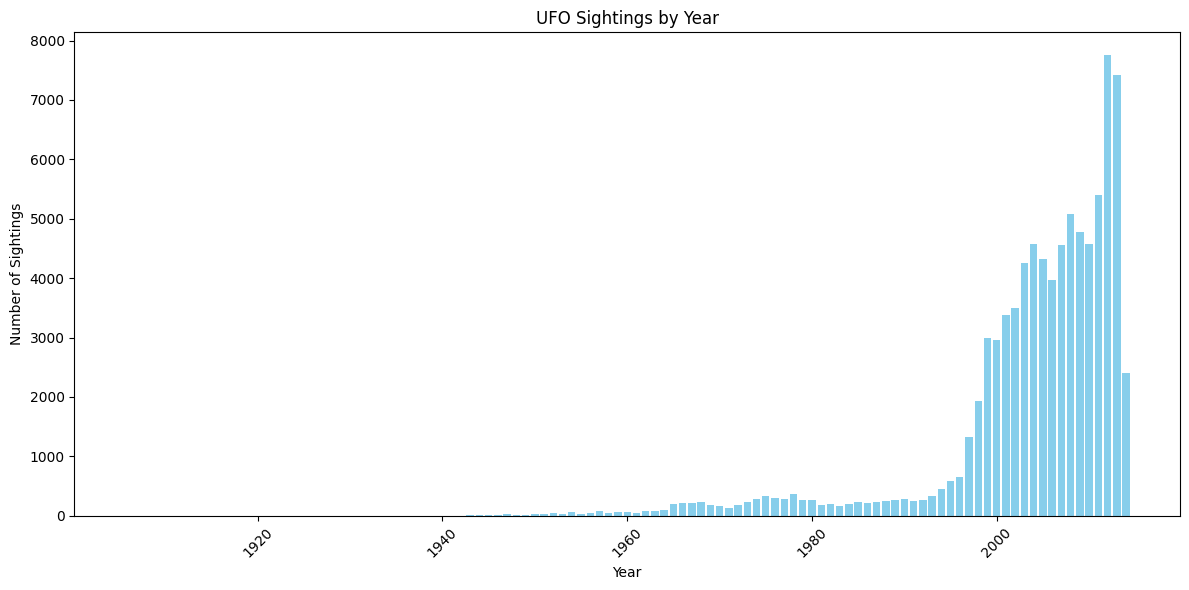

In [ ]:
df['datetime'] = pd.to_datetime(df['datetime'], errors='coerce')
df['year'] = df['datetime'].dt.year
yearly_counts = df['year'].value_counts().sort_index()
plt.figure(figsize=(12, 6))
plt.bar(yearly_counts.index, yearly_counts.values, color='skyblue')
plt.title('UFO Sightings by Year')
plt.xlabel('Year')
plt.ylabel('Number of Sightings')
plt.xticks(rotation=45)
plt.tight_layout()

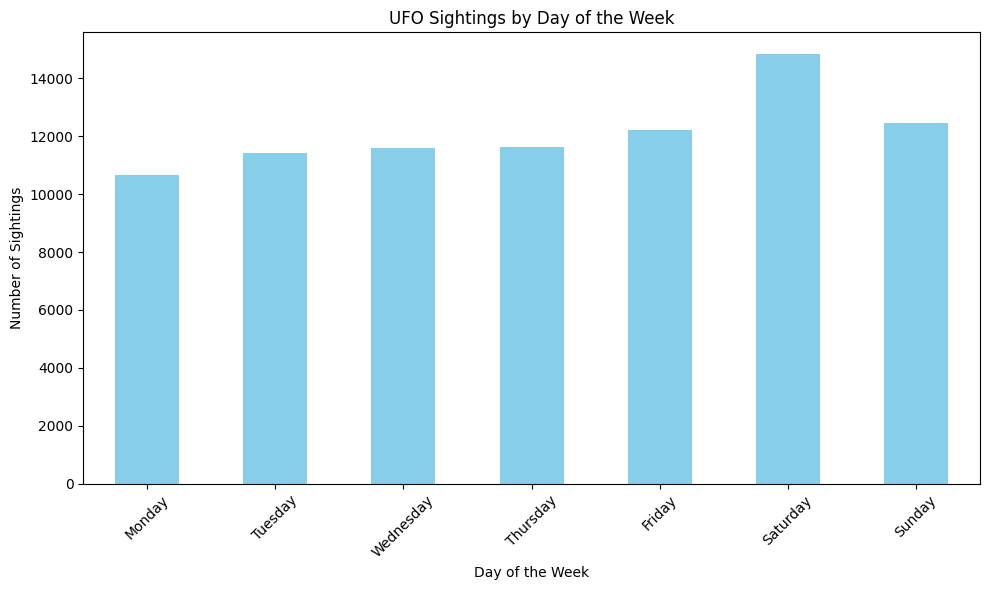

In [ ]:
df['datetime'] = pd.to_datetime(df['datetime'], errors='coerce')
df['day_of_week'] = df['datetime'].dt.day_name()
day_of_week_counts = df['day_of_week'].value_counts()
plt.figure(figsize=(10, 6))
day_of_week_counts = day_of_week_counts.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
day_of_week_counts.plot(kind='bar', color='skyblue')
plt.title('UFO Sightings by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Sightings')
plt.xticks(rotation=45)
plt.tight_layout()

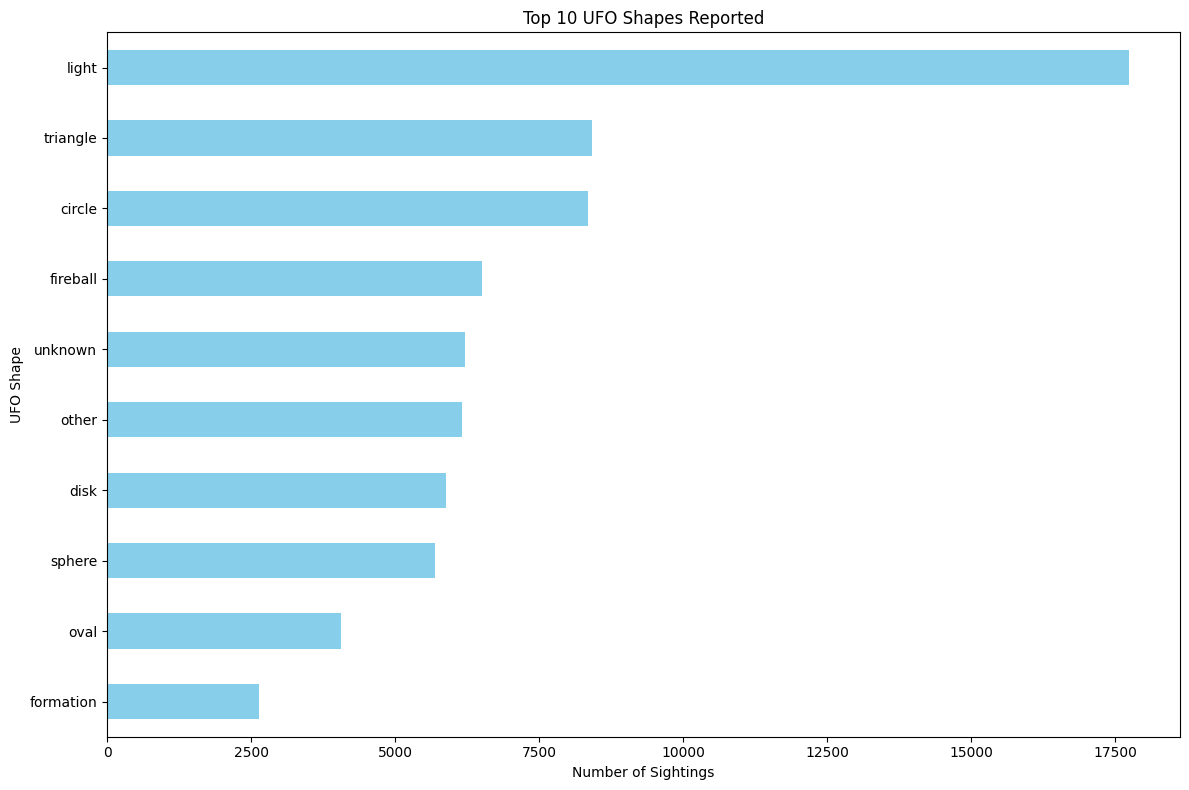

In [ ]:
df = df.dropna(subset=['shape'])
shape_counts = df['shape'].value_counts()
top_n = 10
top_shapes = shape_counts.head(top_n)
plt.figure(figsize=(12, 8))
top_shapes.sort_values(ascending=True).plot(kind='barh', color='skyblue')
plt.title(f'Top {top_n} UFO Shapes Reported')
plt.xlabel('Number of Sightings')
plt.ylabel('UFO Shape')
plt.tight_layout()

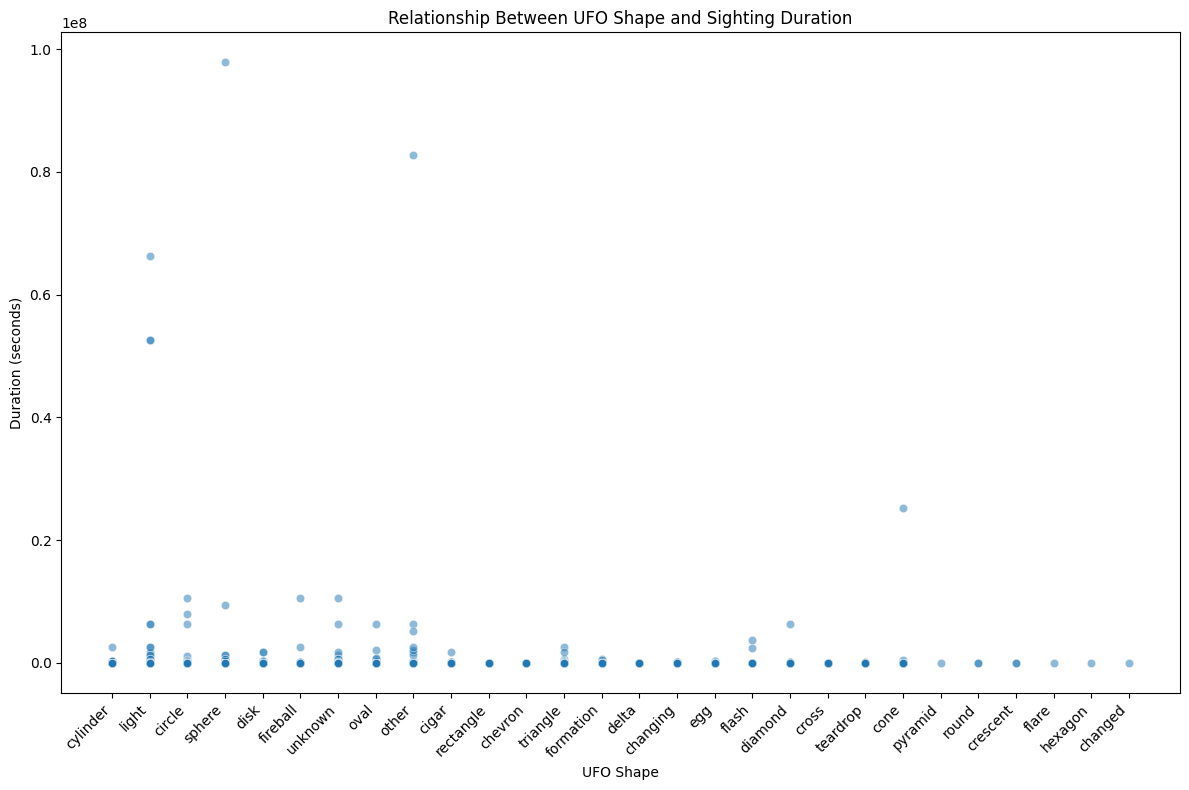

In [ ]:
df = df.dropna(subset=['shape', 'duration (seconds)'])
df['duration (seconds)'] = pd.to_numeric(df['duration (seconds)'], errors='coerce')
plt.figure(figsize=(12, 8))
sns.scatterplot(x='shape', y='duration (seconds)', data=df, alpha=0.5)
plt.title('Relationship Between UFO Shape and Sighting Duration')
plt.xlabel('UFO Shape')
plt.ylabel('Duration (seconds)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

Text(120.72222222222221, 0.5, 'Day of the Week')

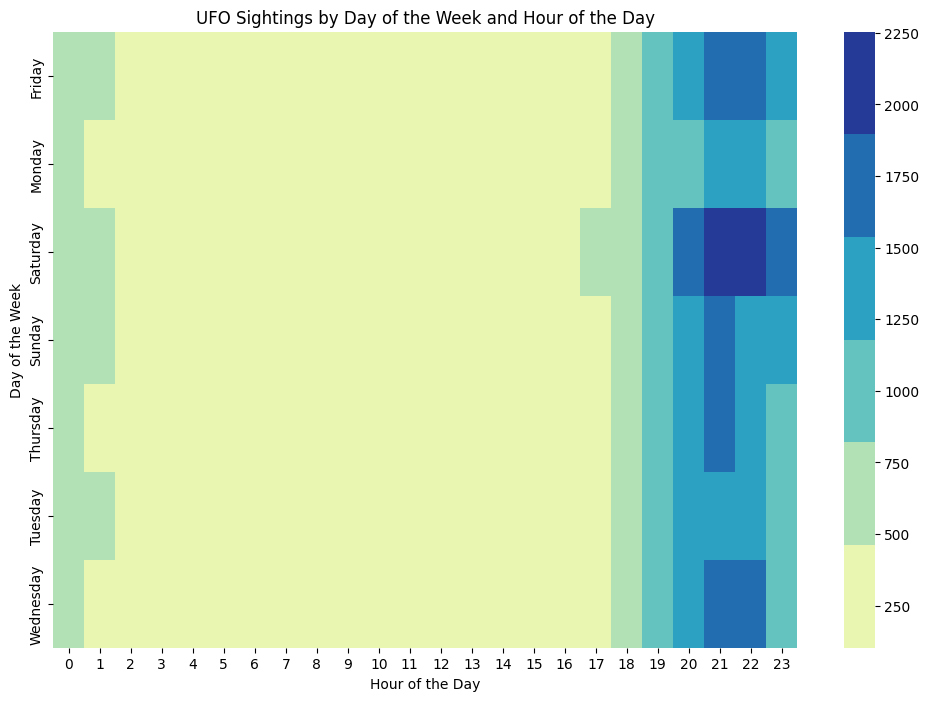

In [ ]:
df = df.dropna(subset=['datetime'])
df['datetime'] = pd.to_datetime(df['datetime'], errors='coerce')
df['day_of_week'] = df['datetime'].dt.day_name()
df['hour_of_day'] = df['datetime'].dt.hour
heatmap_data = df.pivot_table(index='day_of_week', columns='hour_of_day', aggfunc='size', fill_value=0)
cmap = sns.color_palette("YlGnBu")
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap=cmap, cbar=True, annot=False, fmt="d")
plt.title('UFO Sightings by Day of the Week and Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Day of the Week')